In [112]:
import numpy as np
import scipy as sp
import scipy.io as spio
import scipy.signal as spsignal
from matplotlib import pyplot as plt
from PIL import Image


# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01

# Identificação

## Nome: Yan Tavares de Oliveira

## Matrícula: 202014323


# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.


In [113]:
# Código das funções utilizadas.
def deg(n):
    if n >= 0:
        return 1
    else:
        return 0

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.


## Questão 1a (0.5 pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.


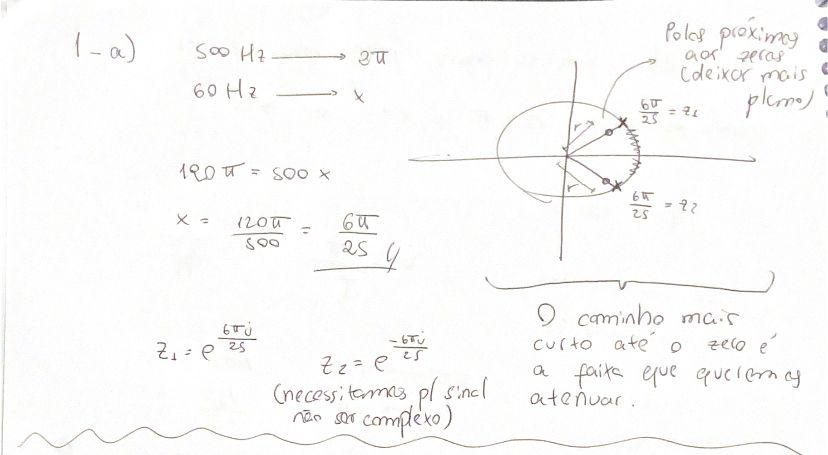

In [114]:
# Resposta da questão 1a
Image.open("1a.jpeg")

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.


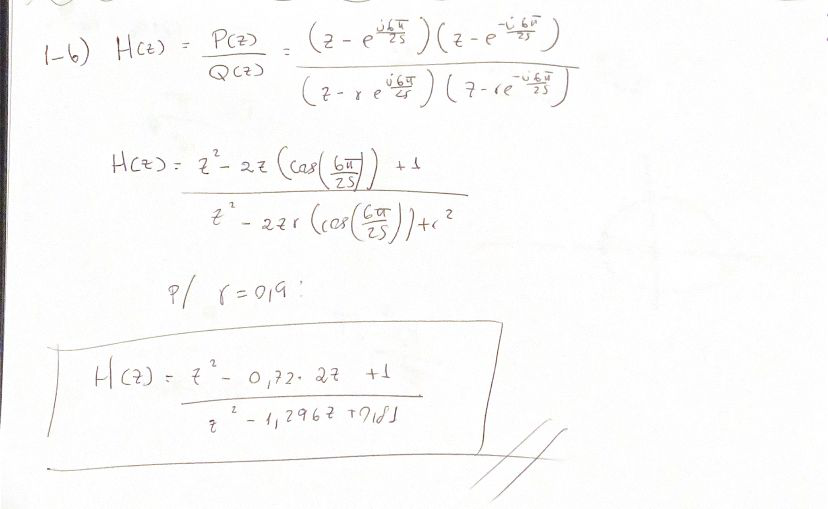

In [115]:
# Resposta da questão 1b
Image.open("1b.jpeg")

## Questão 1c (1 ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase).


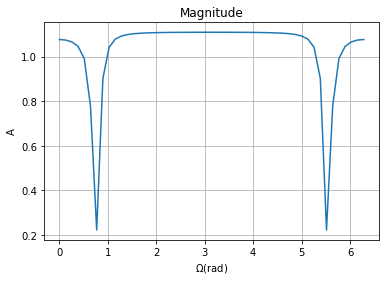

In [116]:
# Resposta da questão 1c
def A1(x):
    return np.sqrt((4.132 - 5.84 * np.cos(x) + 2 * np.cos(2*x))/(3.372 - 4.74 * np.cos(x) + 1.62 * np.cos(2*x)))


x = np.linspace(0, np.pi * 2)

plt.plot(x, A1(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Magnitude")
plt.grid(True)
plt.show()

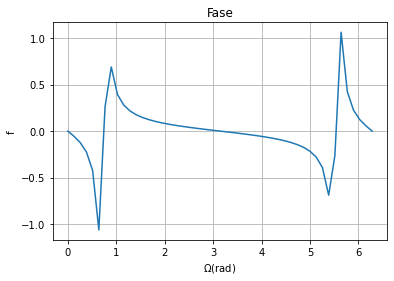

In [117]:
def F(x):
    return np.arctan((0.27 * np.sin(x) - 0.19 * np.sin(2*x))/(3.72 - 5.27 * np.cos(x) + 1.81 * np.cos(2*x)))


plt.plot(x, F(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('f')
plt.title("Fase")
plt.grid(True)
plt.show()

## Questão 1d (0.5 pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).


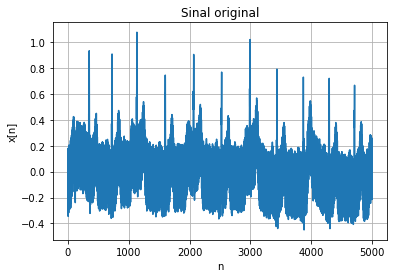

In [118]:
# Resposta da questão 1d
sinal = spio.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel('x[n]')
plt.title("Sinal original")
plt.grid(True)
plt.show()

/var/folders/dw/h2h69h_x1sv72shmlcfp7r6c0000gn/T/ipykernel_1335/3375273284.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - \


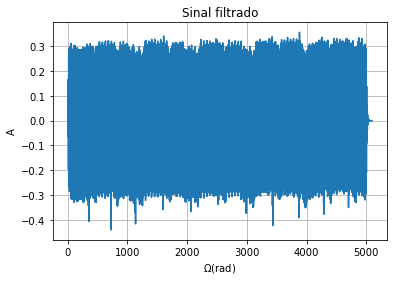

In [119]:
h = np.zeros(100)

# Transformada inversa feita pelo WolframAlpha
for n in range(100):
    h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - \
        (0.117284 + 0.00640434j) * np.exp((-0.105361 + 0.766994j) * n)

filtrado = np.convolve(sinal, h)

plt.plot(filtrado)
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Sinal filtrado")
plt.grid(True)
plt.show()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.


## Questão 2a (0.5 pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.


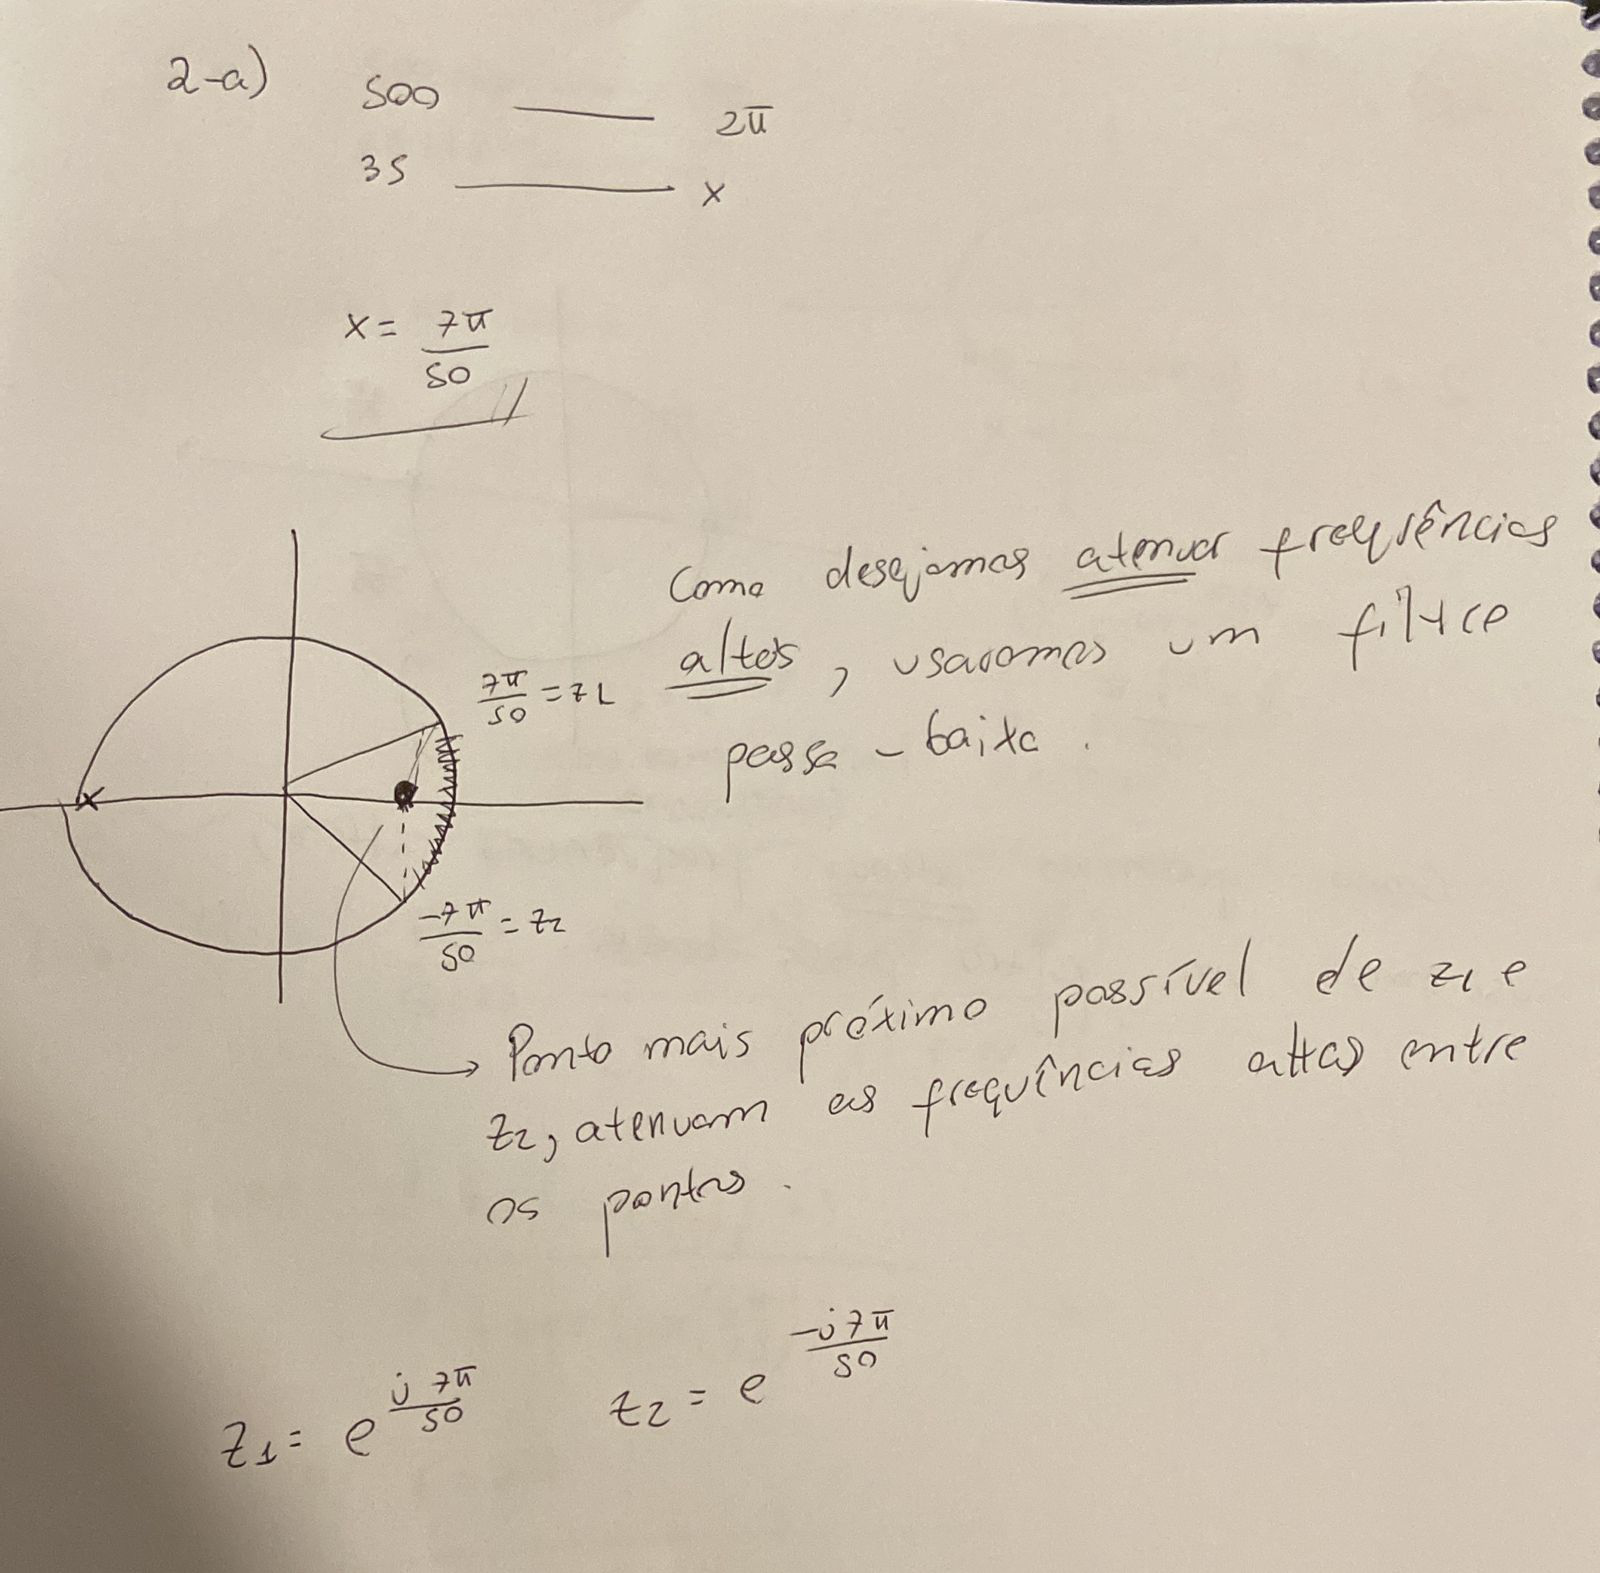

In [120]:
# Resposta da questão 2a
Image.open("2a.jpeg")

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.


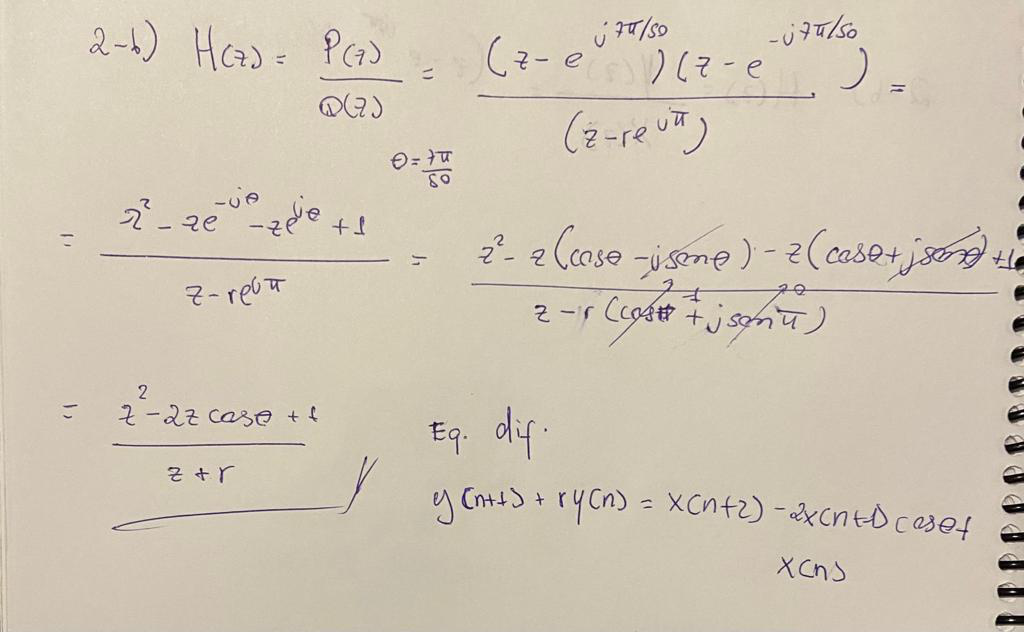

In [121]:
# Resposta da questão 2b
Image.open("2b.jpeg")

## Questão 2c (1 ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase).


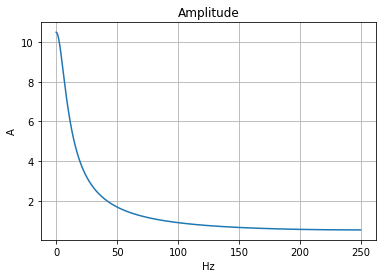

In [122]:
# Resposta da questão 2c
n = [1, 0]
d = [1, -np.cos(7*np.pi / 50)]
fs = 500

freq, h = spsignal.freqz(n, d, fs=fs)
mag = np.abs(h)
ph = np.angle(h)

plt.figure()
plt.plot(freq, mag)
plt.title('Amplitude')
plt.xlabel('Hz')
plt.ylabel('A')
plt.grid(True)
plt.show()

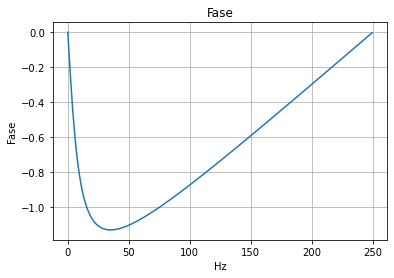

In [123]:

plt.figure()
plt.plot(freq, ph)
plt.title('Fase')
plt.xlabel('Hz')
plt.ylabel('Fase')
plt.grid(True)
plt.show()


## Questão 2d (0.5 pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).


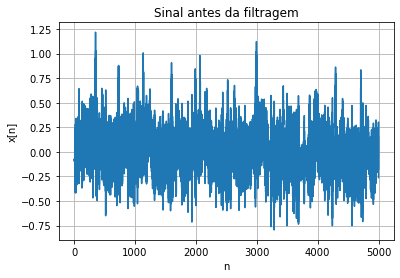

In [124]:
# Resposta da questão 2d

sinal = spio.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

hn = np.zeros(50)

for n in range(50):
    hn[n] = (np.cos(7 * np.pi / 50))**(n) * deg(n)


sinalFiltrado = np.convolve(sinal, hn)

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Sinal antes da filtragem")
plt.grid(True)
plt.show()


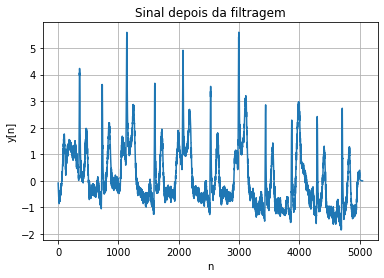

In [125]:
plt.plot(sinalFiltrado)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Sinal depois da filtragem")
plt.grid(True)
plt.show()


# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$


## Questão 3a (1 ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$


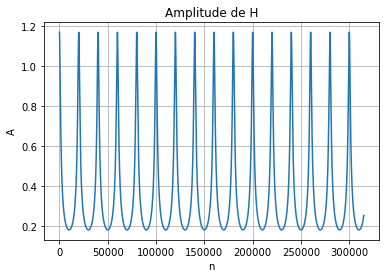

In [126]:
#! VER PAGINA 496 DO LATHI !

# Resposta da questão 3a
omega = np.linspace(0, 315000, 315000)

# Fiz de acordo com a resolução da pagina 496 do Lathi, não sei pq deu tão diferente...

T1 = 0.0001 * np.pi


def H(w):
    return (0.3142 / np.sqrt(1.533 - 1.4608 * np.cos(w*T1)))


plt.plot(H(omega))
plt.xlabel("n")
plt.ylabel('A')
plt.title("Amplitude de H")
plt.grid(True)
plt.show()

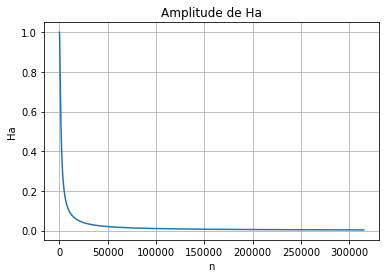

In [127]:
def Ha(w):
    return (1000/(np.sqrt(w**2 + 1000000)))


plt.plot(Ha(omega))
plt.xlabel("n")
plt.ylabel('Ha')
plt.title("Amplitude de Ha")
plt.grid(True)
plt.show()

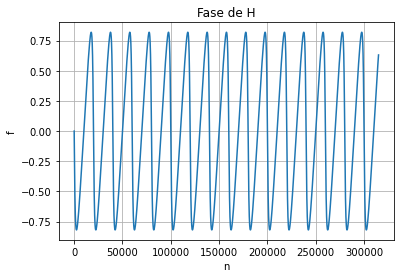

In [128]:
def F(w):
    return -np.arctan((0.7304 * np.sin(w*T1)) / (1 - 0.7304 * np.cos(w * T1)))


plt.plot(F(omega))
plt.xlabel("n")
plt.ylabel('f')
plt.title("Fase de H")
plt.grid(True)
plt.show()

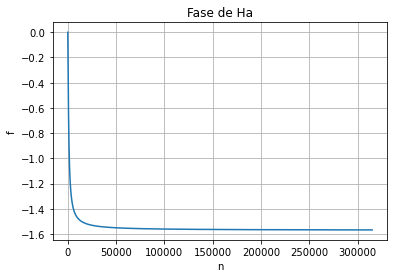

In [129]:
def Fa(w):
    return -np.arctan(w/1000)


plt.plot(Fa(omega))
plt.xlabel("n")
plt.ylabel('f')
plt.title("Fase de Ha")
plt.grid(True)
plt.show()


## Questão 3b (1 ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$


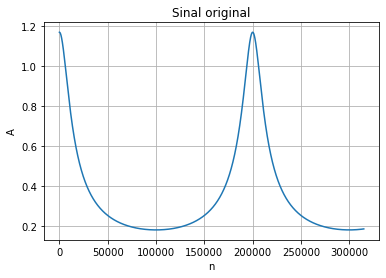

In [130]:
# Resposta da questão 3b
T2 = 0.00001 * np.pi


def H2(w):
    return (0.3142 / np.sqrt(1.533 - 1.4608 * np.cos(w * T2)))


plt.plot(H2(omega))
plt.xlabel("n")
plt.ylabel('A')
plt.title("Sinal original")
plt.grid(True)
plt.show()

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.


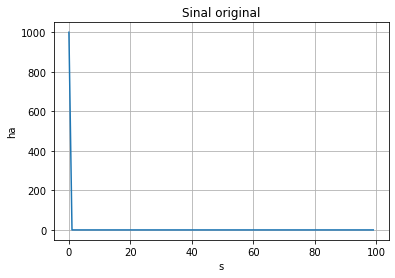

In [131]:
# Resposta da questão 3c
def ha(t):
    return 1000 * np.exp(-1000 * t)


plt.plot(ha(omega[:100]))
plt.xlabel("s")
plt.ylabel('ha')
plt.title("Sinal original")
plt.grid(True)
plt.show()

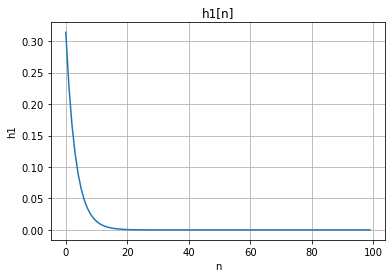

In [132]:
def h1(t):
    return 0.1 * np.pi * np.exp(-0.1*np.pi*t)


plt.plot(h1(omega[:100]))
plt.xlabel("n")
plt.ylabel('h1')
plt.title("h1[n]")
plt.grid(True)
plt.show()

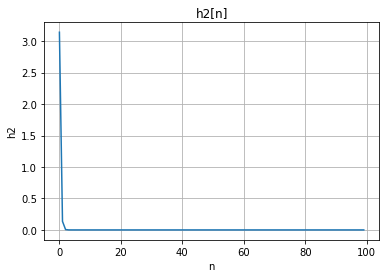

In [133]:
def h2(n):
    return np.pi * np.exp(-np.pi * n)


plt.plot(h2(omega[:100]))
plt.xlabel("n")
plt.ylabel('h2')
plt.title("h2[n]")
plt.grid(True)
plt.show()

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n].


In [134]:
# Resposta da questão 3d